```
______                             _
| ___ \                           (_)
| |_/ /___  __ _ _ __ ___  ___ ___ _  ___  _ __
|    // _ \/ _` | '__/ _ \/ __/ __| |/ _ \| '_ \
| |\ \  __/ (_| | | |  __/\__ \__ \ | (_) | | | |
\_| \_\___|\__, |_|  \___||___/___/_|\___/|_| |_|
            __/ |
           |___/
```

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from helper import get_reg_X_y, plt_decorate, Color


# First example
Here is a 1D problem.

In [2]:
X, y = get_reg_X_y(50)


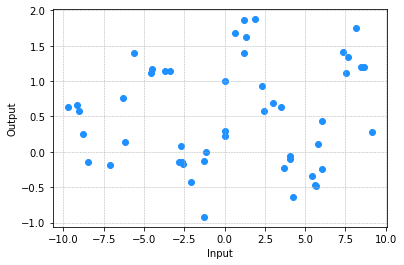

In [3]:
plt.scatter(X.flatten(), y, color=Color.BLUE.value)
plt_decorate()


# Linear regression
## Ordinary least-square
The `ordinary least-square` ([OLS](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))
consists in finding a good linear model
$\hat{y}(x) = w^T x + b$ where $w$ is the weight vector and $b$ is the intercept
(or bias), both needed to learned from the data.

Given a learning matrix $X$ this is done by solving
> $$\min_{w, b} ||y - (Xw + \mathbf{1} b)||$$

where $y$ is the vector containing all the outputs and $\mathbf{1}$ is a vector
containing $n$ $1$.

RMSE: 0.73


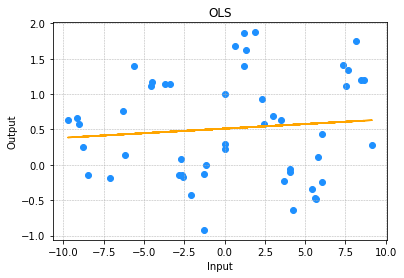

In [4]:
# In sklearn, this is done with a `LinearRegression` instance.
model = LinearRegression().fit(X, y)  # Instantiate and train the model
y_pred = model.predict(X)  # get prediction from the model

rmse = mean_squared_error(y, y_pred) ** .5
print("RMSE: {:.2f}".format(rmse))

plt.scatter(X.flatten(), y, color=Color.BLUE.value)
plt.plot(X.flatten(), y_pred, label="Model prediction", color=Color.ORANGE.value)
plt_decorate(title="OLS")

## Polynomial regression
The linear model does not seem appropriate to model well the data. Could a
polynomial do better? Assuming 1D inputs, we are looking for a model of the
form $P(x) = \sum_{j=1}^m w_j x^j$.

Notice that, although the model is not linear in $x$, it is still linear in
what we are trying to learn: the weights. Overall, we want to train a linear
model in a different input space.


RMSE: 0.30


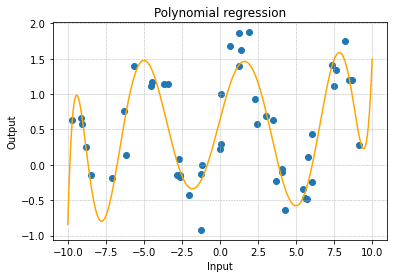

In [5]:
from sklearn.preprocessing import PolynomialFeatures
# Transforming the input space with polynomial features
transf = PolynomialFeatures(degree=10)
X_poly = transf.fit_transform(X)
model_poly = LinearRegression().fit(X_poly, y)
y_pred = model_poly.predict(X_poly)

rmse = mean_squared_error(y, y_pred) ** .5
print("RMSE: {:.2f}".format(rmse))

plt.scatter(X.flatten(), y)
xs = np.linspace(-10, 10, 1000)  # new points for plots
ys = model_poly.predict(transf.transform(xs.reshape(-1, 1)))
plt.plot(xs, ys, label="Model prediction", color="orange")
plt_decorate(title="Polynomial regression")



# Higher input spaces
We focused on a 1D input space so that we could plot the results
but learning algorithms are designed to handle much larger input spaces.
Computer Vision application are usually benchmarked with an input space of 150k
features and more than 1M samples.

> TODO: large scale example

